In [1]:
import warnings
warnings.filterwarnings("ignore") 
from IPython.core.display import display, HTML

import time

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.neighbors import radius_neighbors_graph
from scipy.sparse import csgraph
import scipy

Explorando dados

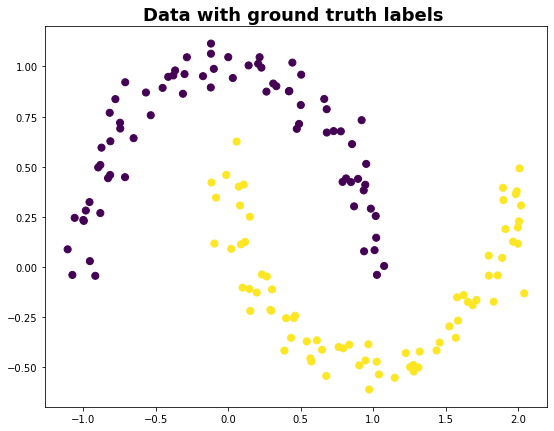

In [2]:
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels ', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

Resultado do KMeans

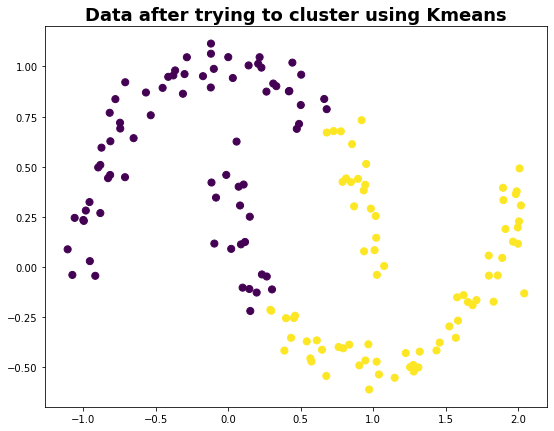

In [3]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data after trying to cluster using Kmeans', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=kmeans.labels_,s=dot_size, cmap=cmap)

## Passo 1
### Construção do grafo de similaridade

In [4]:
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()
A.shape

(150, 150)

In [5]:
A[:5,:5]

array([[0.        , 0.        , 0.        , 0.        , 0.23955829],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23955829, 0.        , 0.        , 0.        , 0.        ]])

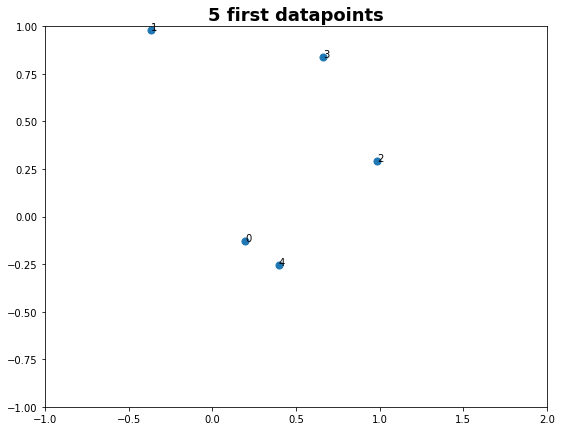

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('5 first datapoints', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:5, 0], X_mn[:5, 1],s=dot_size, cmap=cmap)
for i in range(5):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))

## Passo 2
### Redução de dimensionalidade com o grafo laplaciano

In [7]:
L = csgraph.laplacian(A, normed=False)

In [8]:
L[:5,:5],

(array([[ 3.8892734 , -0.        , -0.        , -0.        , -0.23955829],
        [-0.        ,  3.40126844, -0.        , -0.        , -0.        ],
        [-0.        , -0.        ,  3.00486906, -0.        , -0.        ],
        [-0.        , -0.        , -0.        ,  3.45831612, -0.        ],
        [-0.23955829, -0.        , -0.        , -0.        ,  4.06569259]]),)

In [9]:
B = np.sum(A,axis=0)
B[:2]

array([3.8892734 , 3.40126844])

## Passo 3
### Aplicar clusterização clássica (KMeans) sobre os autovetores do grafo laplaciano

In [11]:
_, eigvec = scipy.linalg.eig(L)

Definição das classes

In [12]:
y_spec = KMeans(n_clusters=2, max_iter=100).fit(eigvec[:, :1]).labels_

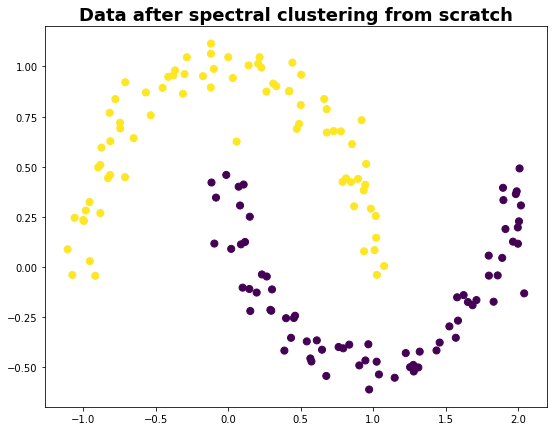

In [13]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data after spectral clustering from scratch', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)